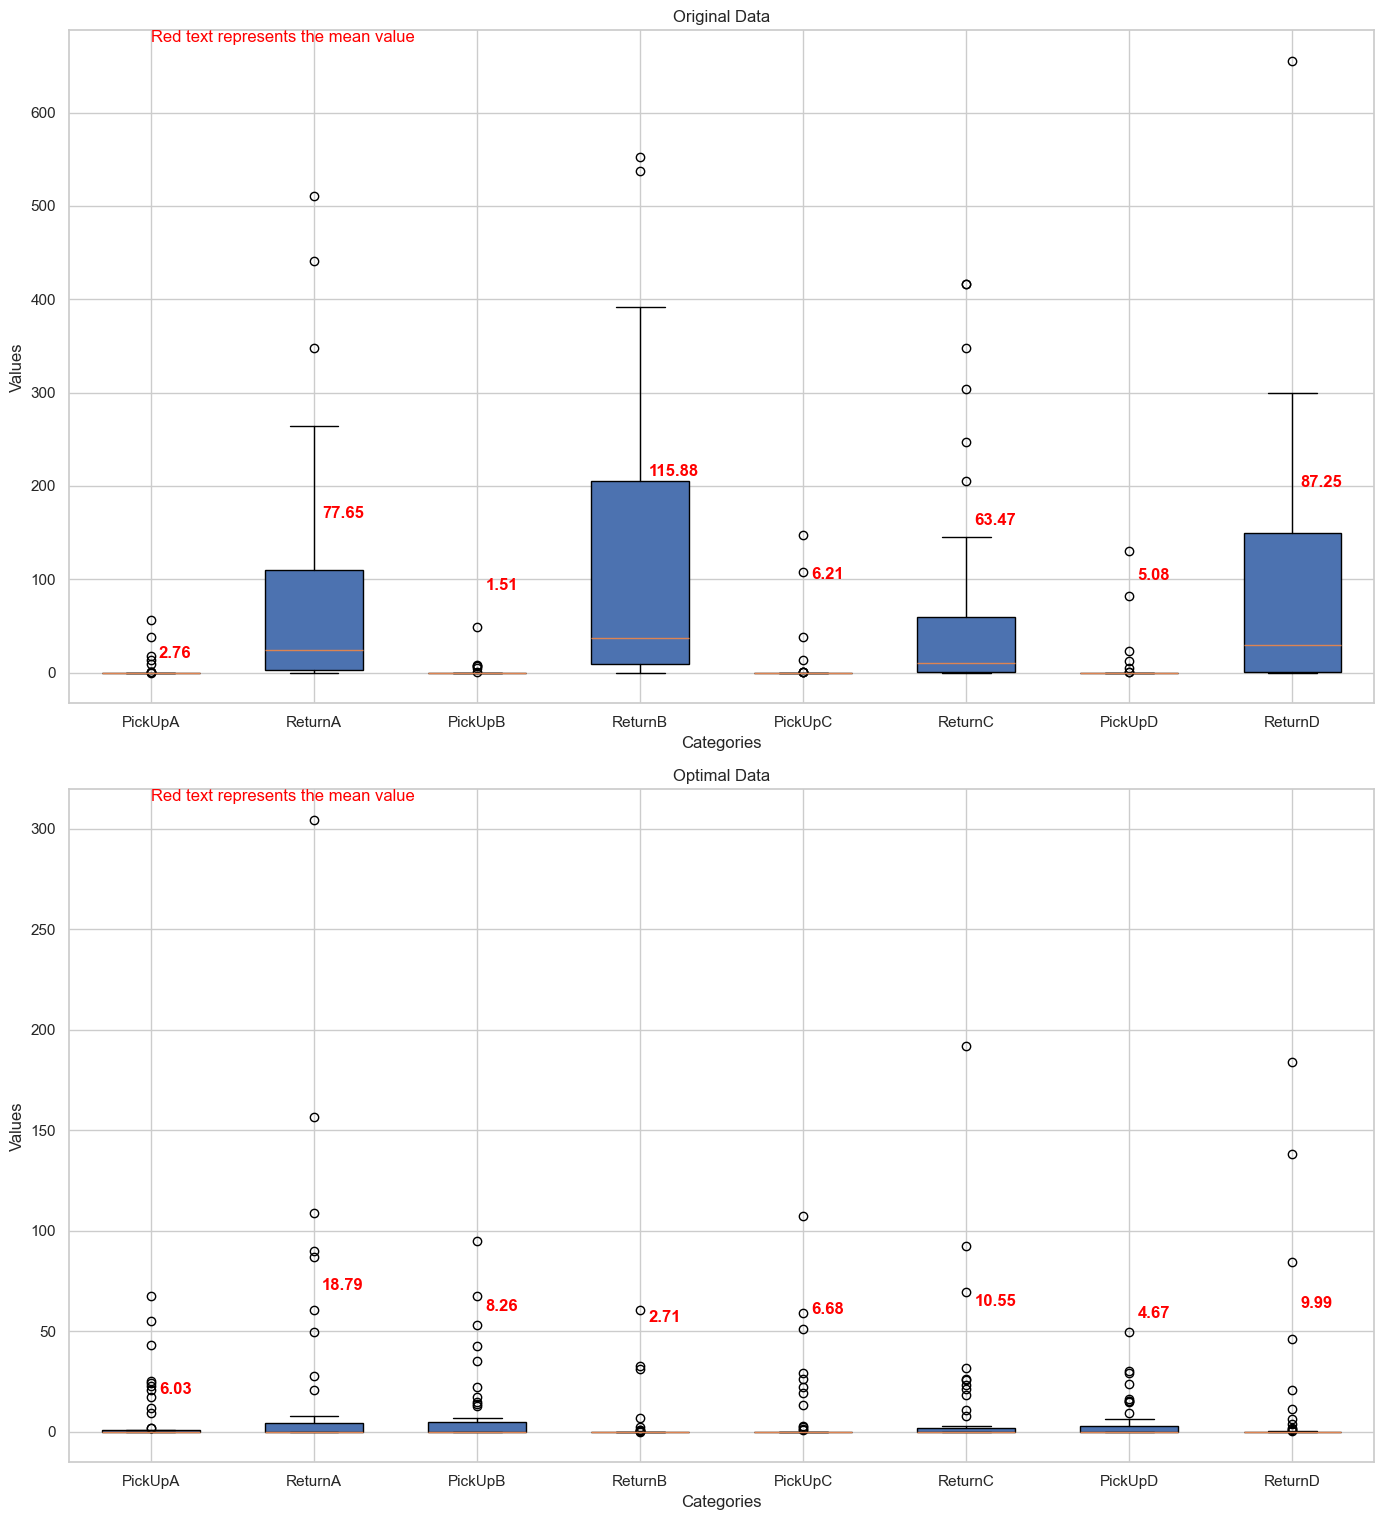

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
optimal_df = pd.read_csv('optimal.csv')
original_df = pd.read_csv('original.csv')

# 保留列名称的前7个字符
optimal_df.columns = [col[:7] for col in optimal_df.columns]
original_df.columns = [col[:7] for col in original_df.columns]

# 确保两组数据有相同的列
columns = optimal_df.columns.intersection(original_df.columns)

# 设置seaborn样式
sns.set(style="whitegrid")

# 创建两个箱线图
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# 绘制Original数据的箱线图
for i, col in enumerate(columns):
    data = original_df[col].dropna()
    box = axs[0].boxplot(data, positions=[i], widths=0.6, patch_artist=True)
    median = np.median(data)
    mean = np.mean(data)
    axs[0].text(i + 0.05, mean + 0.15 * (axs[0].get_ylim()[1] - axs[0].get_ylim()[0]), f'{mean:.2f}', 
                verticalalignment='bottom', color='red', weight='bold')

axs[0].set_xticks(range(len(columns)))
axs[0].set_xticklabels(columns)
axs[0].set_title('Original Data')
axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Values')
axs[0].text(0, axs[0].get_ylim()[1], 'Red text represents the mean value', 
            verticalalignment='top', horizontalalignment='left', fontsize=12, color='red')

# 绘制Optimal数据的箱线图
for i, col in enumerate(columns):
    data = optimal_df[col].dropna()
    box = axs[1].boxplot(data, positions=[i], widths=0.6, patch_artist=True)
    median = np.median(data)
    mean = np.mean(data)
    axs[1].text(i + 0.05, mean + 0.15 * (axs[1].get_ylim()[1] - axs[1].get_ylim()[0]), f'{mean:.2f}', 
                verticalalignment='bottom', color='red', weight='bold')

axs[1].set_xticks(range(len(columns)))
axs[1].set_xticklabels(columns)
axs[1].set_title('Optimal Data')
axs[1].set_xlabel('Categories')
axs[1].set_ylabel('Values')
axs[1].text(0, axs[1].get_ylim()[1], 'Red text represents the mean value', 
            verticalalignment='top', horizontalalignment='left', fontsize=12, color='red')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


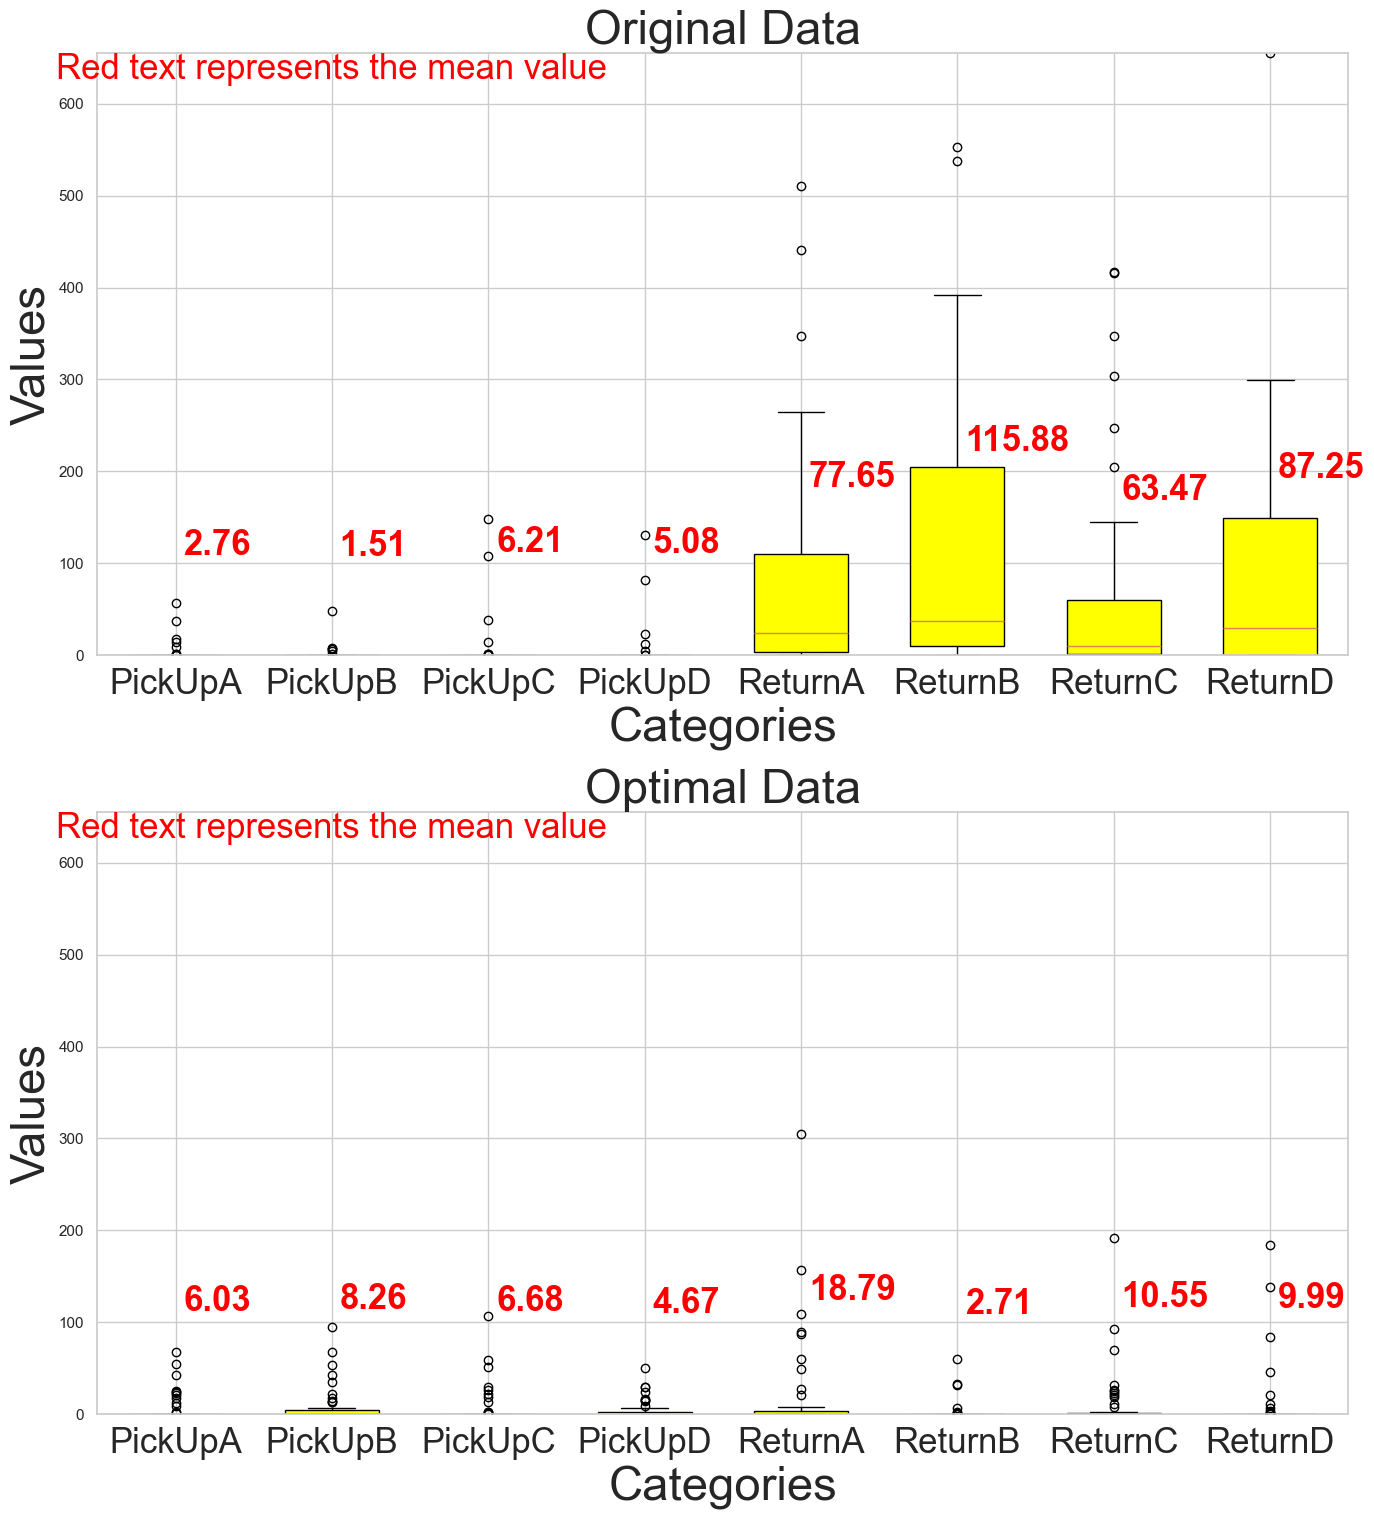

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
optimal_df = pd.read_csv('optimal.csv')
original_df = pd.read_csv('original.csv')

# 保留列名称的前7个字符
optimal_df.columns = [col[:7] for col in optimal_df.columns]
original_df.columns = [col[:7] for col in original_df.columns]

# 确保两组数据有相同的列
columns = optimal_df.columns.intersection(original_df.columns)

# 按照需求排序列：先pickup再return
pickup_columns = [col for col in columns if 'PickUp' in col]
return_columns = [col for col in columns if 'Return' in col]
sorted_columns = pickup_columns + return_columns

# 设置seaborn样式
sns.set(style="whitegrid")

# 找出所有数据的最大值和最小值，以统一y轴范围
all_data = pd.concat([optimal_df[sorted_columns], original_df[sorted_columns]])
y_min, y_max = all_data.min().min(), all_data.max().max()

# 创建两个箱线图
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# 定义亮黄色作为填充颜色
bright_color = '#FFFF00'

# 设置字体大小
font_size = 30

# 绘制Original数据的箱线图
for i, col in enumerate(sorted_columns):
    data = original_df[col].dropna()
    box = axs[0].boxplot(data, positions=[i], widths=0.6, patch_artist=True,
                         boxprops=dict(facecolor=bright_color))
    median = np.median(data)
    mean = np.mean(data)
    axs[0].text(i + 0.05, mean + 0.15 * (y_max - y_min), f'{mean:.2f}', 
                verticalalignment='bottom', color='red', weight='bold', fontsize=font_size-5)

axs[0].set_xticks(range(len(sorted_columns)))
axs[0].set_xticklabels(sorted_columns, fontsize=font_size-5)
axs[0].set_title('Original Data', fontsize=font_size + 4)
axs[0].set_xlabel('Categories', fontsize=font_size+4)
axs[0].set_ylabel('Values', fontsize=font_size+4)
axs[0].text(1, y_max, 'Red text represents the mean value', 
            verticalalignment='top', horizontalalignment='center', fontsize=font_size-5, color='red')
axs[0].set_ylim(y_min, y_max)

# 绘制Optimal数据的箱线图
for i, col in enumerate(sorted_columns):
    data = optimal_df[col].dropna()
    box = axs[1].boxplot(data, positions=[i], widths=0.6, patch_artist=True,
                         boxprops=dict(facecolor=bright_color))
    median = np.median(data)
    mean = np.mean(data)
    axs[1].text(i + 0.05, mean + 0.15 * (y_max - y_min), f'{mean:.2f}', 
                verticalalignment='bottom', color='red', weight='bold', fontsize=font_size-5)

axs[1].set_xticks(range(len(sorted_columns)))
axs[1].set_xticklabels(sorted_columns, fontsize=font_size-5)
axs[1].set_title('Optimal Data', fontsize=font_size + 4)
axs[1].set_xlabel('Categories', fontsize=font_size+4)
axs[1].set_ylabel('Values', fontsize=font_size+4)
axs[1].text(1, y_max, 'Red text represents the mean value', 
            verticalalignment='top', horizontalalignment='center', fontsize=font_size-5, color='red')
axs[1].set_ylim(y_min, y_max)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


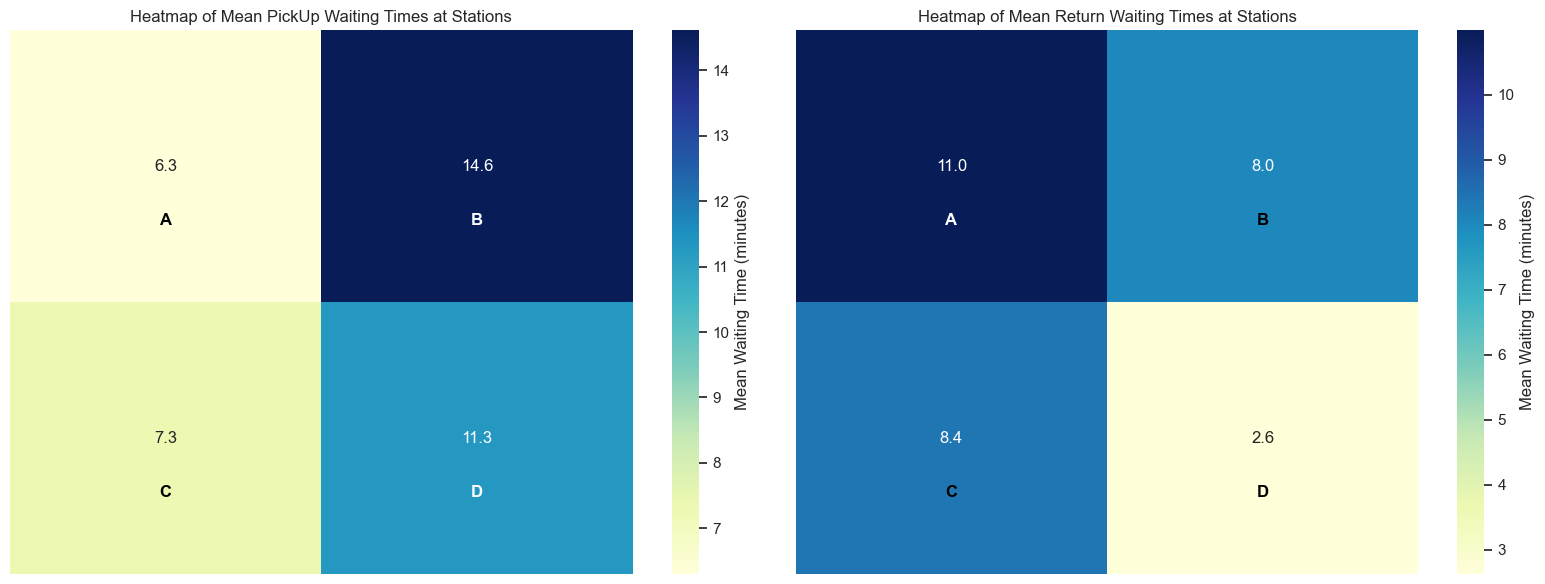

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 读取上传的CSV文件
file_path = 'optimalP.csv'
data = pd.read_csv(file_path)

# 假设CSV文件包含PickUp和Return的等待时间数据，并包含列'PickUp'和'Return'
# 这里的代码根据实际列名进行调整
pickup_data = data[['PickUpA', 'PickUpB', 'PickUpC', 'PickUpD']]
return_data = data[['ReturnA', 'ReturnB', 'ReturnC', 'ReturnD']]

# 计算平均等待时间
mean_pickup_times = pickup_data.mean().values.reshape(2, 2)
mean_return_times = return_data.mean().values.reshape(2, 2)

# 调整标签顺序
pickup_stations = np.array([['A', 'B'], ['C', 'D']])
return_stations = np.array([['A', 'B'], ['C', 'D']])

# 绘制PickUp和Return热力图，并排放置
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 绘制PickUp热力图
sns.heatmap(mean_pickup_times, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Mean Waiting Time (minutes)'}, xticklabels=False, yticklabels=False, ax=ax1)
for i in range(pickup_stations.shape[0]):
    for j in range(pickup_stations.shape[1]):
        color = 'white' if mean_pickup_times[i, j] > 10 else 'black'
        ax1.text(j + 0.5, i + 0.7, pickup_stations[i, j], color=color, ha='center', va='center', fontsize=12, weight='bold')
ax1.set_title('Heatmap of Mean PickUp Waiting Times at Stations')

# 绘制Return热力图
sns.heatmap(mean_return_times, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Mean Waiting Time (minutes)'}, xticklabels=False, yticklabels=False, ax=ax2)
for i in range(return_stations.shape[0]):
    for j in range(return_stations.shape[1]):
        color = 'white' if mean_return_times[i, j] > 10 else 'black'
        ax2.text(j + 0.5, i + 0.7, return_stations[i, j], color=color, ha='center', va='center', fontsize=12, weight='bold')
ax2.set_title('Heatmap of Mean Return Waiting Times at Stations')

plt.tight_layout()
plt.show()
